In [1]:
import numpy as np
import nb

In [2]:
trainMatrix, tokenlist, trainCategory = nb.readMatrix('MATRIX.TRAIN')
testMatrix, tokenlist, testCategory = nb.readMatrix('MATRIX.TEST')

state = nb.nb_train(trainMatrix, trainCategory)

In [3]:
output = nb.nb_test(testMatrix, state)
error = nb.evaluate(output, testCategory)

Error: 0.0163


(Extra materials) It is an increasingly known result that binarized Multinomial Naive Bayes (MNB) is better than the standard MNB taught in the lectures. Note that binarized MNB is NOT the same as multi-variate Bernoulli event model. See Spam Filtering with Naive Bayes - Which Naive Bayes? (Metsis et al., 2006).

In [4]:
# Binarized Multinomial Naive Bayes
# Note that the features constructed here are the same as those in multi-variate Bernoulli event model
trainMatrix = (trainMatrix > 0)
testMatrix = (testMatrix > 0)

In [5]:
# Re-train the standard MNB, but with these new features
state = nb.nb_train(trainMatrix, trainCategory)

In [6]:
output = nb.nb_test(testMatrix, state)
error = nb.evaluate(output, testCategory)

Error: 0.0075


The error is reduced from 1.63% to 0.75%.

###################################################################################################################

Need to use the parameters fit in part (a), so re-train the standard MNB model.

In [7]:
trainMatrix, tokenlist, trainCategory = nb.readMatrix('MATRIX.TRAIN')
testMatrix, tokenlist, testCategory = nb.readMatrix('MATRIX.TEST')

state = nb.nb_train(trainMatrix, trainCategory)

In [8]:
def indicativeToken(state, tokenlist, mostIndicative):
    logLikelihoodRatio = np.log(state['phi|y=1']) - np.log(state['phi|y=0'])
    indices = logLikelihoodRatio.argsort()[-mostIndicative:]
    for index in indices:
        print(tokenlist[index])

In [9]:
indicativeToken(state = state, tokenlist = tokenlist, mostIndicative = 5)

valet
ebai
unsubscrib
spam
httpaddr


###################################################################################################################

In [10]:
import matplotlib.pyplot as plt

In [11]:
errorList = []
testMatrix, tokenlist, testCategory = nb.readMatrix('MATRIX.TEST')
trainingSetSize = [50, 100, 200, 400, 800, 1400]
for i in trainingSetSize:
    trainMatrix, tokenlist, trainCategory = nb.readMatrix('MATRIX.TRAIN.' + str(i))
    state = nb.nb_train(trainMatrix, trainCategory)
    output = nb.nb_test(testMatrix, state)
    error = nb.evaluate(output, testCategory)
    errorList.append(error)

Error: 0.0387
Error: 0.0262
Error: 0.0262
Error: 0.0187
Error: 0.0175
Error: 0.0163


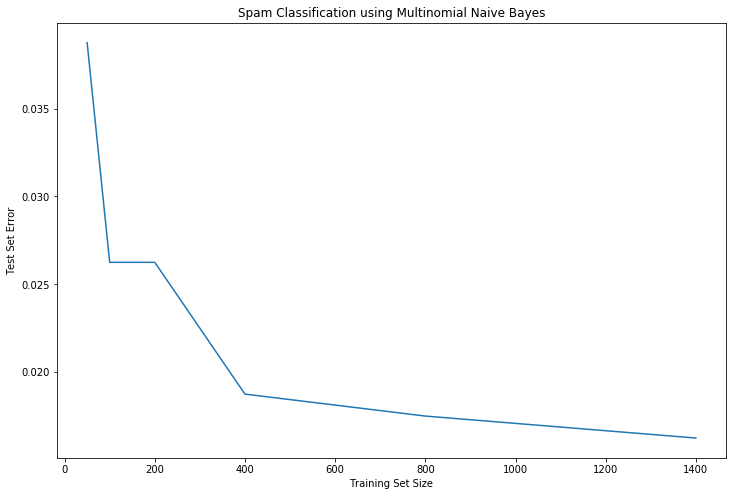

In [12]:
fig = plt.figure(1, figsize = (12,8))

# Plot the learning curve
plt.plot(trainingSetSize, errorList)

# Other settings
plt.xlabel('Training Set Size')
plt.ylabel('Test Set Error')
plt.title('Spam Classification using Multinomial Naive Bayes')
plt.show()

The best test set error is achieved when training set size is 1400.

###################################################################################################################

In [13]:
import svm

In [14]:
errorList = []
testMatrix, tokenlist, testCategory = svm.readMatrix('MATRIX.TEST')
trainingSetSize = [50, 100, 200, 400, 800, 1400]
for i in trainingSetSize:
    trainMatrix, tokenlist, trainCategory = svm.readMatrix('MATRIX.TRAIN.' + str(i))
    state = svm.svm_train(trainMatrix, trainCategory)
    output = svm.svm_test(testMatrix, state)
    error = svm.evaluate(output, testCategory)
    errorList.append(error)

Error: 0.0213
Error: 0.0175
Error: 0.0025
Error: 0.0025
Error: 0.0000
Error: 0.0000


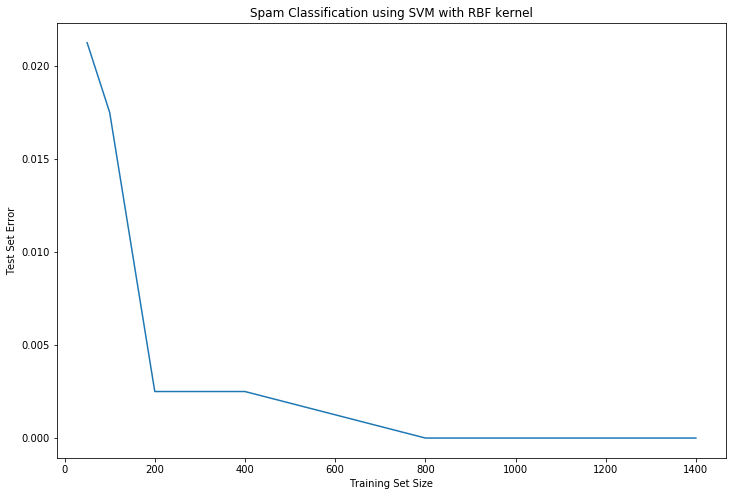

In [15]:
fig = plt.figure(1, figsize = (12,8))

# Plot the learning curve
plt.plot(trainingSetSize, errorList)

# Other settings
plt.xlabel('Training Set Size')
plt.ylabel('Test Set Error')
plt.title('Spam Classification using SVM with RBF kernel')
plt.show()

###################################################################################################################

At any given training set size, SVM has a lower generalization error than Naive Bayes. Moreover, as the training set size gets larger, the generalization error of SVM drcreases rapidly (and can get to zero) whereas that of Naive Bayes drops steadily.